In [1]:
import pandas as pd
import pickle
from catboost import CatBoostRegressor, Pool
from sklearn.ensemble import AdaBoostRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# Use only last 3 datasets for fitting models

#df1 = pd.read_csv('datasets/db_waw_flats.csv', parse_dates = ['today', 'publication_date'])
#df2 = pd.read_csv('datasets/db_waw_flats_17_06.csv', parse_dates = ['today', 'publication_date'])
#df3 = pd.read_csv('datasets/db_waw_flats_27_6.csv', parse_dates = ['today', 'publication_date'])
#df4 = pd.read_csv('datasets/db_waw_flats_10_7.csv', parse_dates = ['today', 'publication_date'])
#df5 = pd.read_csv('datasets/db_waw_flats_27_7.csv', parse_dates = ['today', 'publication_date'])
#df6 = pd.read_csv('datasets/db_waw_flats_3_8.csv', parse_dates = ['today', 'publication_date'])
#df7 = pd.read_csv('datasets/db_waw_flats_16_8.csv', parse_dates = ['today', 'publication_date'])
df7 = pd.read_csv('datasets/db_waw_flats_23_10.csv', parse_dates = ['today', 'publication_date'])
df8 = pd.read_csv('datasets/db_waw_flats_29_10.csv', parse_dates = ['today', 'publication_date'])
df9 = pd.read_csv('datasets/db_waw_flats_3_11.csv', parse_dates = ['today', 'publication_date'])

In [3]:
cols_x = ['district', 'area', 'rooms', 'renovation', 'floor', 'balcony', 'terrace',
          'garden', 'parking', 'central_heating', 'market', 'seller', 'blok', 'elevator']

cat_cols = ['district', 'renovation', 'floor', 'balcony', 'terrace', 'garden', 'parking',
            'central_heating', 'market', 'seller', 'blok', 'elevator']
col_y = ['price']

In [58]:
#df10 = pd.read_csv('datasets/db_waw_flats_23_10.csv', parse_dates = ['today', 'publication_date'])
#model_df = df10[cols_x + col_y].dropna()
#le = pickle.load(open('district_encode', 'rb'))
#model_df['district'] = le.transform(model_df['district'])
#X_train, X_test, y_train, y_test = train_test_split(model_df[cols_x], model_df['price'], test_size=0.2, shuffle=False)

In [22]:
#from sklearn.neighbors import KNeighborsRegressor
#neigh = KNeighborsRegressor()
#neigh.fit(X_train, y_train)
#neigh_preds = neigh.predict(X_test)
#k_neigh = neigh.kneighbors(X_test, return_distance=False)
#k_neigh

array([[2094, 2122, 3370, 2914, 3807],
       [2027,  519, 5027, 1558, 3579],
       [ 843, 4966, 3268, 3332, 3098],
       ...,
       [2558, 3339, 2728,  734, 2259],
       [  73, 2719, 5815, 4926, 4180],
       [2638, 1802, 1319, 1684, 3192]])

In [104]:
#upper = df10['cena_m'].quantile(q=0.95)
#lower = df10['cena_m'].quantile(q=0.05)
#low = df10.cena_m[(df10['cena_m']>lower)&(df10['cena_m']<upper)]

In [106]:
#low.median()

15850.007091192738

<AxesSubplot:ylabel='cena_m'>

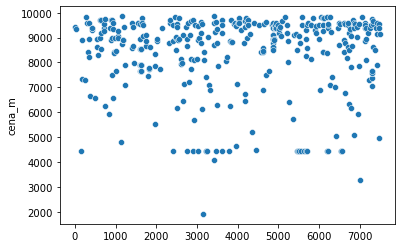

In [103]:
#import seaborn as sns
#sns.scatterplot(data=low)

In [12]:
# KNeighbors quality
#print('percentage error', mean_absolute_percentage_error(y_test, neigh_preds))
#print('absolute error', mean_absolute_error(y_test, neigh_preds))
#print('root squared error', mean_squared_error(y_test, neigh_preds, squared=False))

percentage error 0.2340086592160813
absolute error 396107.08561917447
root squared error 985462.8544231873


In [4]:
common_df = pd.concat([df7,df8,df9], ignore_index=True)
common_df.drop(columns=['index'], inplace=True)

In [5]:
common_df

,price,area,rooms,renovation,floor,market,elevator,street,district,balcony,terrace,garden,parking,central_heating,seller,blok,cena_m,today,link,publication_date
0,950000.0,68.80,3.0,3,2,2,1,ursynów północny,ursynów,1,0,0,0,1,2,1,13808.139535,2023-10-23,mieszkanie-na-starym-ursynowie-blisko-metra-ID...,2023-10-23 16:35:39
1,950000.0,61.88,4.0,3,2,1,1,ul. posag 7 panien,ursus,1,0,0,1,1,2,1,15352.294764,2023-10-23,3-pak-9-3-roi-62m2-nowe-osiedle-gotowe-do-12-2...,2023-10-08 16:31:42
2,1169000.0,68.60,3.0,3,1,2,1,ul. gen. tadeusza pełczyńskiego,bemowo,1,0,0,1,1,1,1,17040.816327,2023-10-23,3-pokojowe-mieszkanie-na-bemowie-pelczynskiego...,2023-10-19 20:29:40
3,1290000.0,80.92,3.0,0,2,2,0,ul. dalanowska,targówek,0,0,0,0,0,1,0,15941.670786,2023-10-23,ciche-i-sloneczne-mieszkanie-na-targowku-ID4nk7e,2023-09-29 20:15:11
4,815000.0,48.80,3.0,3,2,2,0,ul. gorlicka,ochota,0,0,0,0,0,1,0,16700.819672,2023-10-23,trzy-pokojowe-mieszkanie-na-zielonej-ochocie-I...,2023-10-23 12:12:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22590,3000000.0,178.00,5.0,3,2,2,1,al. aleja wyścigowa,mokotów,1,1,0,1,1,1,0,16853.932584,2023-11-03,pieciopokojowy-apartament-w-prestizowej-inwest...,2019-04-11 15:46:58
22591,6485000.0,262.00,5.0,3,1,2,1,ul. hanki czaki,żoliborz,0,1,0,0,1,1,0,24751.908397,2023-11-03,penthouse-na-zoliborzu-przy-stacji-metra-ID3TaOQ,2019-01-21 15:43:00
22592,5049000.0,159.00,4.0,3,2,2,1,pl. plac politechniki,śródmieście,1,0,0,0,1,1,0,31754.716981,2023-11-03,odnowiona-kamienica-plac-poitechniki-metro-ID3...,2018-12-20 16:00:09
22593,1810000.0,130.00,5.0,3,0,2,1,al. aleja wilanowska,mokotów,0,0,1,0,0,1,0,13923.076923,2023-11-03,mieszkanie-130-m-warszawa-ID3EcOY,2018-05-16 14:20:10


In [6]:
common_df.drop_duplicates(subset='link', keep='last', inplace=True, ignore_index=True)
common_df

,price,area,rooms,renovation,floor,market,elevator,street,district,balcony,terrace,garden,parking,central_heating,seller,blok,cena_m,today,link,publication_date
0,678000.0,48.00,3.0,0,1,2,0,ul. przasnyska,żoliborz,1,0,0,0,1,1,1,14125.000000,2023-10-23,mieszkanie-48-m2-3-pok-ul-przasnyska-metro-ID4...,2023-10-23 16:15:45
1,800000.0,44.11,2.0,3,1,2,1,ul. gen. władysława andersa,śródmieście,0,0,0,0,1,1,0,18136.476989,2023-10-23,obok-ogrodu-krasinskich-i-pl-bankowego-ID4nfBW,2023-09-25 19:35:51
2,1702730.0,83.06,4.0,2,0,1,1,ul. kolejowa,wola,0,1,1,1,1,1,0,20500.000000,2023-10-23,gotowe-4-pokoje-z-ogrodem-147m2-ID4nDXg,2023-10-23 15:33:25
3,569000.0,36.60,2.0,0,0,2,0,al. aleje jerozolimskie,włochy,1,0,0,0,1,1,1,15546.448087,2023-10-23,ochota-dwa-pokoje-oddzielna-kuchnia-ID4nDVm,2023-10-23 15:25:22
4,2900000.0,123.40,4.0,3,2,2,1,solec,śródmieście,0,1,0,1,1,1,0,23500.810373,2023-10-23,apartament-powisle-z-widokiem-na-park-ID4l37m,2023-04-11 12:44:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9502,3000000.0,178.00,5.0,3,2,2,1,al. aleja wyścigowa,mokotów,1,1,0,1,1,1,0,16853.932584,2023-11-03,pieciopokojowy-apartament-w-prestizowej-inwest...,2019-04-11 15:46:58
9503,6485000.0,262.00,5.0,3,1,2,1,ul. hanki czaki,żoliborz,0,1,0,0,1,1,0,24751.908397,2023-11-03,penthouse-na-zoliborzu-przy-stacji-metra-ID3TaOQ,2019-01-21 15:43:00
9504,5049000.0,159.00,4.0,3,2,2,1,pl. plac politechniki,śródmieście,1,0,0,0,1,1,0,31754.716981,2023-11-03,odnowiona-kamienica-plac-poitechniki-metro-ID3...,2018-12-20 16:00:09
9505,1810000.0,130.00,5.0,3,0,2,1,al. aleja wilanowska,mokotów,0,0,1,0,0,1,0,13923.076923,2023-11-03,mieszkanie-130-m-warszawa-ID3EcOY,2018-05-16 14:20:10


In [7]:
cols_x = ['district', 'area', 'rooms', 'renovation', 'floor', 'balcony', 'terrace',
          'garden', 'parking', 'central_heating', 'market', 'seller', 'blok', 'elevator']

cat_cols = ['district', 'renovation', 'floor', 'balcony', 'terrace', 'garden', 'parking',
            'central_heating', 'market', 'seller', 'blok', 'elevator']
col_y = ['price']

model_df = common_df[cols_x + col_y].dropna()

In [8]:
#le = preprocessing.LabelEncoder()
#le.fit(model_df['district'])
le = pickle.load(open('district_encode', 'rb'))
model_df['district'] = le.transform(model_df['district'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(model_df[cols_x], model_df['price'], test_size=0.2, shuffle=False)

In [12]:
from sklearn.tree import DecisionTreeRegressor
est = DecisionTreeRegressor(random_state=0, max_depth=12)
ada_model = AdaBoostRegressor(estimator=est, random_state=0, n_estimators=50, learning_rate=0.05, loss='square')
ada_model.fit(X_train, y_train)
ada_preds = ada_model.predict(X_test)

In [13]:
# Adaboost quality
print('percentage error', mean_absolute_percentage_error(y_test, ada_preds))
print('absolute error', mean_absolute_error(y_test, ada_preds))
print('root squared error', mean_squared_error(y_test, ada_preds, squared=False))

percentage error 0.17185251451941977
absolute error 303402.4858627074
root squared error 976164.7592820192


In [19]:
# Catboost is fitting automatically during parsing new data in parse_data.py

#from catboost import Pool, CatBoostRegressor

#train_pool = Pool(X_train, y_train, cat_features=cat_cols)
#test_pool = Pool(X_test, cat_features=cat_cols)
#cb_model = CatBoostRegressor(iterations=3000, learning_rate=0.04, l2_leaf_reg=1, depth=8)
#cb_model.fit(train_pool)
#cb_preds = cb_model.predict(test_pool)

In [52]:
# Load catboost
cb_model = CatBoostRegressor().load_model("cb_model.cbm")

test_pool = Pool(X_test, cat_features=cat_cols)
cb_preds = cb_model.predict(test_pool)

In [11]:
print('percentage error', mean_absolute_percentage_error(y_test, cb_preds))
print('absolute error', mean_absolute_error(y_test, cb_preds))
print('root squared error', mean_squared_error(y_test, cb_preds, squared=False))

percentage error 0.18031067846696835
absolute error 311659.8710709182
root squared error 882129.7802909906


In [14]:
lr_df = pd.DataFrame(data=ada_preds.reshape(-1,1), columns=['ada_preds'])
lr_df['cb_preds'] = cb_preds
lr_df['y'] = y_test.values
len_split = len(lr_df)//2
train = lr_df[:len_split]
test = lr_df[len_split:]

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train.drop(columns=['y']), train['y'])
lr_preds = lr.predict(test.drop(columns=['y']))

In [16]:
# Check regression quality
print('percentage error', mean_absolute_percentage_error(test['y'], lr_preds))
print('absolute error', mean_absolute_error(test['y'], lr_preds))
print('root squared error', mean_squared_error(test['y'], lr_preds, squared=False))

percentage error 0.21364757000699464
absolute error 420593.19997780194
root squared error 1202161.3686149118


In [20]:
# Fit models on full dataset
ada_model.fit(model_df[cols_x], model_df['price'])
ada_preds = ada_model.predict(model_df[cols_x])
cb_model.fit(Pool(model_df[cols_x], model_df['price'], cat_features=cat_cols))
cb_preds = cb_model.predict(Pool(model_df[cols_x], cat_features=cat_cols))
new_df = pd.DataFrame(data=ada_preds.reshape(-1,1), columns=['ada_preds'])
new_df['cb_preds'] = cb_preds
new_df['y'] = model_df['price']
lr.fit(new_df.drop(columns=['y']), model_df['price'])

0:	learn: 1157584.0804532	total: 4.94ms	remaining: 14.8s
1:	learn: 1128758.1075095	total: 9.52ms	remaining: 14.3s
2:	learn: 1102708.3910802	total: 13.8ms	remaining: 13.8s
3:	learn: 1076432.3703054	total: 17.8ms	remaining: 13.3s
4:	learn: 1051108.8108141	total: 21.3ms	remaining: 12.8s
5:	learn: 1027426.6440298	total: 25.2ms	remaining: 12.6s
6:	learn: 1005159.0049931	total: 28.9ms	remaining: 12.4s
7:	learn: 983863.4833077	total: 33ms	remaining: 12.3s
8:	learn: 963015.3023121	total: 37ms	remaining: 12.3s
9:	learn: 943838.0532310	total: 41.2ms	remaining: 12.3s
10:	learn: 924997.7814126	total: 45.2ms	remaining: 12.3s
11:	learn: 909953.6560360	total: 46.8ms	remaining: 11.6s
12:	learn: 892157.8638197	total: 50.4ms	remaining: 11.6s
13:	learn: 876300.2205022	total: 54.4ms	remaining: 11.6s
14:	learn: 860562.2164353	total: 59.1ms	remaining: 11.8s
15:	learn: 845199.7782545	total: 63.4ms	remaining: 11.8s
16:	learn: 830554.7077155	total: 67.6ms	remaining: 11.9s
17:	learn: 817364.6154897	total: 71.3m

147:	learn: 425805.2260920	total: 594ms	remaining: 11.4s
148:	learn: 425327.4873374	total: 601ms	remaining: 11.5s
149:	learn: 424125.5147556	total: 606ms	remaining: 11.5s
150:	learn: 421899.9163874	total: 610ms	remaining: 11.5s
151:	learn: 420261.3294344	total: 615ms	remaining: 11.5s
152:	learn: 419828.9985380	total: 620ms	remaining: 11.5s
153:	learn: 419240.5484922	total: 624ms	remaining: 11.5s
154:	learn: 417833.6855756	total: 627ms	remaining: 11.5s
155:	learn: 417274.6189658	total: 631ms	remaining: 11.5s
156:	learn: 416170.6145095	total: 636ms	remaining: 11.5s
157:	learn: 415026.6373814	total: 640ms	remaining: 11.5s
158:	learn: 414677.0406753	total: 644ms	remaining: 11.5s
159:	learn: 414285.4580580	total: 648ms	remaining: 11.5s
160:	learn: 414144.9465575	total: 651ms	remaining: 11.5s
161:	learn: 413620.1358507	total: 655ms	remaining: 11.5s
162:	learn: 413597.2853795	total: 656ms	remaining: 11.4s
163:	learn: 411975.0688789	total: 660ms	remaining: 11.4s
164:	learn: 411822.9804372	tota

337:	learn: 316485.9991879	total: 1.38s	remaining: 10.9s
338:	learn: 316234.5133600	total: 1.39s	remaining: 10.9s
339:	learn: 316025.1874399	total: 1.4s	remaining: 10.9s
340:	learn: 315491.1653866	total: 1.4s	remaining: 10.9s
341:	learn: 315091.0910568	total: 1.41s	remaining: 10.9s
342:	learn: 314397.6544932	total: 1.41s	remaining: 10.9s
343:	learn: 314325.7247304	total: 1.41s	remaining: 10.9s
344:	learn: 314028.2813561	total: 1.42s	remaining: 10.9s
345:	learn: 313930.8699118	total: 1.42s	remaining: 10.9s
346:	learn: 313740.9219973	total: 1.43s	remaining: 10.9s
347:	learn: 313463.2214505	total: 1.43s	remaining: 10.9s
348:	learn: 313341.2955291	total: 1.44s	remaining: 10.9s
349:	learn: 312915.9020638	total: 1.44s	remaining: 10.9s
350:	learn: 312177.8919840	total: 1.45s	remaining: 10.9s
351:	learn: 311911.4640788	total: 1.45s	remaining: 10.9s
352:	learn: 311741.1695245	total: 1.46s	remaining: 10.9s
353:	learn: 311404.6405970	total: 1.46s	remaining: 10.9s
354:	learn: 310447.3812825	total:

522:	learn: 267055.0644774	total: 2.17s	remaining: 10.3s
523:	learn: 266915.8374929	total: 2.18s	remaining: 10.3s
524:	learn: 266827.7655187	total: 2.18s	remaining: 10.3s
525:	learn: 266340.4435012	total: 2.19s	remaining: 10.3s
526:	learn: 266135.5671311	total: 2.19s	remaining: 10.3s
527:	learn: 265933.6405669	total: 2.2s	remaining: 10.3s
528:	learn: 265589.1763383	total: 2.2s	remaining: 10.3s
529:	learn: 265336.5310800	total: 2.21s	remaining: 10.3s
530:	learn: 265220.2263790	total: 2.21s	remaining: 10.3s
531:	learn: 265054.3593156	total: 2.21s	remaining: 10.3s
532:	learn: 264857.6194146	total: 2.22s	remaining: 10.3s
533:	learn: 264729.0672755	total: 2.22s	remaining: 10.3s
534:	learn: 264359.4671778	total: 2.23s	remaining: 10.3s
535:	learn: 264168.3017361	total: 2.23s	remaining: 10.3s
536:	learn: 263841.7348727	total: 2.24s	remaining: 10.3s
537:	learn: 263655.2886354	total: 2.24s	remaining: 10.3s
538:	learn: 263463.7148391	total: 2.25s	remaining: 10.3s
539:	learn: 263238.4993104	total:

710:	learn: 236585.8589436	total: 2.97s	remaining: 9.57s
711:	learn: 236414.6418756	total: 2.98s	remaining: 9.57s
712:	learn: 236081.6549399	total: 2.98s	remaining: 9.57s
713:	learn: 235964.8233222	total: 2.99s	remaining: 9.57s
714:	learn: 235893.4362329	total: 2.99s	remaining: 9.57s
715:	learn: 235697.1839222	total: 3s	remaining: 9.56s
716:	learn: 235505.0579355	total: 3s	remaining: 9.56s
717:	learn: 235293.6847744	total: 3.01s	remaining: 9.56s
718:	learn: 235190.2189205	total: 3.01s	remaining: 9.55s
719:	learn: 235057.8904833	total: 3.02s	remaining: 9.55s
720:	learn: 234795.6938579	total: 3.02s	remaining: 9.55s
721:	learn: 234538.3318006	total: 3.02s	remaining: 9.54s
722:	learn: 234471.9826536	total: 3.03s	remaining: 9.54s
723:	learn: 234411.3524770	total: 3.03s	remaining: 9.54s
724:	learn: 234389.2246712	total: 3.04s	remaining: 9.53s
725:	learn: 234273.5757774	total: 3.04s	remaining: 9.53s
726:	learn: 234225.9307478	total: 3.05s	remaining: 9.53s
727:	learn: 234042.5418119	total: 3.0

881:	learn: 219441.9287328	total: 3.77s	remaining: 9.04s
882:	learn: 219408.3811134	total: 3.77s	remaining: 9.04s
883:	learn: 219397.2221405	total: 3.78s	remaining: 9.04s
884:	learn: 219335.0392415	total: 3.78s	remaining: 9.04s
885:	learn: 219262.3635483	total: 3.79s	remaining: 9.04s
886:	learn: 219198.5548157	total: 3.79s	remaining: 9.04s
887:	learn: 219081.4446787	total: 3.8s	remaining: 9.04s
888:	learn: 218974.9686472	total: 3.8s	remaining: 9.03s
889:	learn: 218915.0143946	total: 3.81s	remaining: 9.03s
890:	learn: 218865.6041765	total: 3.81s	remaining: 9.02s
891:	learn: 218824.4995747	total: 3.82s	remaining: 9.02s
892:	learn: 218759.6062975	total: 3.82s	remaining: 9.01s
893:	learn: 218696.4083083	total: 3.83s	remaining: 9.01s
894:	learn: 218664.3143415	total: 3.83s	remaining: 9.01s
895:	learn: 218568.5785135	total: 3.83s	remaining: 9s
896:	learn: 218490.3004608	total: 3.84s	remaining: 9s
897:	learn: 218360.8686641	total: 3.84s	remaining: 8.99s
898:	learn: 218219.6822205	total: 3.85s

1061:	learn: 206406.1725821	total: 4.55s	remaining: 8.31s
1062:	learn: 206350.1586212	total: 4.56s	remaining: 8.3s
1063:	learn: 206165.8049328	total: 4.56s	remaining: 8.3s
1064:	learn: 206124.0722130	total: 4.57s	remaining: 8.3s
1065:	learn: 206090.2090096	total: 4.57s	remaining: 8.29s
1066:	learn: 206005.2745619	total: 4.57s	remaining: 8.29s
1067:	learn: 205932.7075415	total: 4.58s	remaining: 8.29s
1068:	learn: 205805.7339923	total: 4.58s	remaining: 8.28s
1069:	learn: 205698.0693465	total: 4.59s	remaining: 8.28s
1070:	learn: 205680.5939080	total: 4.59s	remaining: 8.27s
1071:	learn: 205646.0425757	total: 4.6s	remaining: 8.27s
1072:	learn: 205578.5528606	total: 4.6s	remaining: 8.26s
1073:	learn: 205571.0747857	total: 4.61s	remaining: 8.26s
1074:	learn: 205465.8958332	total: 4.61s	remaining: 8.26s
1075:	learn: 205347.6336939	total: 4.61s	remaining: 8.25s
1076:	learn: 205313.6571327	total: 4.62s	remaining: 8.25s
1077:	learn: 205228.4764773	total: 4.62s	remaining: 8.24s
1078:	learn: 205210

1205:	learn: 196887.6425729	total: 5.15s	remaining: 7.66s
1206:	learn: 196850.3335943	total: 5.16s	remaining: 7.66s
1207:	learn: 196805.1525343	total: 5.16s	remaining: 7.66s
1208:	learn: 196756.7997328	total: 5.17s	remaining: 7.65s
1209:	learn: 196732.7303656	total: 5.17s	remaining: 7.65s
1210:	learn: 196726.8485796	total: 5.17s	remaining: 7.64s
1211:	learn: 196700.5963038	total: 5.18s	remaining: 7.64s
1212:	learn: 196572.4966317	total: 5.18s	remaining: 7.64s
1213:	learn: 196477.6258460	total: 5.19s	remaining: 7.63s
1214:	learn: 196430.2326928	total: 5.19s	remaining: 7.63s
1215:	learn: 196396.1880007	total: 5.2s	remaining: 7.62s
1216:	learn: 196310.6618626	total: 5.2s	remaining: 7.62s
1217:	learn: 196271.4199609	total: 5.2s	remaining: 7.61s
1218:	learn: 196226.0678053	total: 5.21s	remaining: 7.61s
1219:	learn: 196214.4508138	total: 5.21s	remaining: 7.6s
1220:	learn: 196180.7800852	total: 5.22s	remaining: 7.6s
1221:	learn: 196151.8249832	total: 5.22s	remaining: 7.6s
1222:	learn: 196092.

1348:	learn: 189319.0963380	total: 5.74s	remaining: 7.03s
1349:	learn: 189266.5836284	total: 5.75s	remaining: 7.02s
1350:	learn: 189175.8780834	total: 5.75s	remaining: 7.02s
1351:	learn: 189139.0594260	total: 5.76s	remaining: 7.02s
1352:	learn: 189113.9639071	total: 5.76s	remaining: 7.01s
1353:	learn: 189098.2723162	total: 5.77s	remaining: 7.01s
1354:	learn: 189093.6284653	total: 5.77s	remaining: 7s
1355:	learn: 189001.7113175	total: 5.77s	remaining: 7s
1356:	learn: 188961.0925915	total: 5.78s	remaining: 7s
1357:	learn: 188876.4062645	total: 5.78s	remaining: 6.99s
1358:	learn: 188766.2043933	total: 5.79s	remaining: 6.99s
1359:	learn: 188721.3144991	total: 5.79s	remaining: 6.98s
1360:	learn: 188680.2958804	total: 5.79s	remaining: 6.98s
1361:	learn: 188618.8728802	total: 5.8s	remaining: 6.97s
1362:	learn: 188466.4639522	total: 5.8s	remaining: 6.97s
1363:	learn: 188442.8706573	total: 5.81s	remaining: 6.97s
1364:	learn: 188439.8898895	total: 5.81s	remaining: 6.96s
1365:	learn: 188415.28852

1491:	learn: 181643.5568533	total: 6.34s	remaining: 6.41s
1492:	learn: 181535.2056877	total: 6.34s	remaining: 6.4s
1493:	learn: 181436.3759371	total: 6.35s	remaining: 6.4s
1494:	learn: 181407.7271408	total: 6.35s	remaining: 6.39s
1495:	learn: 181378.5991884	total: 6.36s	remaining: 6.39s
1496:	learn: 181272.8237798	total: 6.36s	remaining: 6.38s
1497:	learn: 181206.8206296	total: 6.36s	remaining: 6.38s
1498:	learn: 181197.2785054	total: 6.37s	remaining: 6.38s
1499:	learn: 181162.0414974	total: 6.37s	remaining: 6.37s
1500:	learn: 181108.8500799	total: 6.38s	remaining: 6.37s
1501:	learn: 181058.7635694	total: 6.38s	remaining: 6.36s
1502:	learn: 181014.6668841	total: 6.38s	remaining: 6.36s
1503:	learn: 180890.2521266	total: 6.39s	remaining: 6.36s
1504:	learn: 180795.1890187	total: 6.39s	remaining: 6.35s
1505:	learn: 180783.3545828	total: 6.4s	remaining: 6.35s
1506:	learn: 180735.3174119	total: 6.4s	remaining: 6.34s
1507:	learn: 180673.2993567	total: 6.41s	remaining: 6.34s
1508:	learn: 18064

1634:	learn: 174967.2067670	total: 6.93s	remaining: 5.78s
1635:	learn: 174949.5207293	total: 6.93s	remaining: 5.78s
1636:	learn: 174946.2594757	total: 6.94s	remaining: 5.78s
1637:	learn: 174866.6386830	total: 6.94s	remaining: 5.77s
1638:	learn: 174855.5996695	total: 6.95s	remaining: 5.77s
1639:	learn: 174798.2507217	total: 6.95s	remaining: 5.76s
1640:	learn: 174741.3423927	total: 6.95s	remaining: 5.76s
1641:	learn: 174724.7977919	total: 6.96s	remaining: 5.75s
1642:	learn: 174710.5796655	total: 6.96s	remaining: 5.75s
1643:	learn: 174660.3907182	total: 6.97s	remaining: 5.75s
1644:	learn: 174578.9902770	total: 6.97s	remaining: 5.74s
1645:	learn: 174551.2739335	total: 6.97s	remaining: 5.74s
1646:	learn: 174492.4372494	total: 6.98s	remaining: 5.73s
1647:	learn: 174482.4949554	total: 6.98s	remaining: 5.73s
1648:	learn: 174423.8696777	total: 6.99s	remaining: 5.72s
1649:	learn: 174387.9291670	total: 6.99s	remaining: 5.72s
1650:	learn: 174326.9074285	total: 6.99s	remaining: 5.71s
1651:	learn: 1

1777:	learn: 168889.7766128	total: 7.53s	remaining: 5.17s
1778:	learn: 168868.0347005	total: 7.53s	remaining: 5.17s
1779:	learn: 168852.5399178	total: 7.54s	remaining: 5.16s
1780:	learn: 168837.3052803	total: 7.54s	remaining: 5.16s
1781:	learn: 168803.3070321	total: 7.54s	remaining: 5.16s
1782:	learn: 168783.1019690	total: 7.55s	remaining: 5.15s
1783:	learn: 168700.3635269	total: 7.55s	remaining: 5.15s
1784:	learn: 168678.9730875	total: 7.56s	remaining: 5.14s
1785:	learn: 168640.6479507	total: 7.56s	remaining: 5.14s
1786:	learn: 168627.2560349	total: 7.56s	remaining: 5.13s
1787:	learn: 168583.5047040	total: 7.57s	remaining: 5.13s
1788:	learn: 168532.5351514	total: 7.57s	remaining: 5.13s
1789:	learn: 168515.0209083	total: 7.58s	remaining: 5.12s
1790:	learn: 168418.1625488	total: 7.58s	remaining: 5.12s
1791:	learn: 168408.3031948	total: 7.58s	remaining: 5.11s
1792:	learn: 168370.0161537	total: 7.59s	remaining: 5.11s
1793:	learn: 168255.9590019	total: 7.59s	remaining: 5.1s
1794:	learn: 16

1965:	learn: 161939.5247591	total: 8.32s	remaining: 4.38s
1966:	learn: 161929.1134279	total: 8.32s	remaining: 4.37s
1967:	learn: 161895.1383248	total: 8.33s	remaining: 4.37s
1968:	learn: 161890.5471822	total: 8.33s	remaining: 4.36s
1969:	learn: 161841.9761485	total: 8.34s	remaining: 4.36s
1970:	learn: 161762.6801060	total: 8.34s	remaining: 4.36s
1971:	learn: 161731.0070726	total: 8.35s	remaining: 4.35s
1972:	learn: 161691.3492558	total: 8.35s	remaining: 4.35s
1973:	learn: 161631.8968301	total: 8.36s	remaining: 4.34s
1974:	learn: 161623.3329433	total: 8.36s	remaining: 4.34s
1975:	learn: 161598.3293900	total: 8.36s	remaining: 4.33s
1976:	learn: 161554.1818661	total: 8.37s	remaining: 4.33s
1977:	learn: 161497.6144993	total: 8.37s	remaining: 4.33s
1978:	learn: 161483.8685074	total: 8.38s	remaining: 4.32s
1979:	learn: 161476.1959456	total: 8.38s	remaining: 4.32s
1980:	learn: 161400.1750816	total: 8.38s	remaining: 4.31s
1981:	learn: 161355.2057847	total: 8.39s	remaining: 4.31s
1982:	learn: 1

2152:	learn: 155918.5372450	total: 9.11s	remaining: 3.58s
2153:	learn: 155908.8795257	total: 9.12s	remaining: 3.58s
2154:	learn: 155888.5089973	total: 9.12s	remaining: 3.58s
2155:	learn: 155813.2519057	total: 9.13s	remaining: 3.57s
2156:	learn: 155797.9587020	total: 9.13s	remaining: 3.57s
2157:	learn: 155784.0187116	total: 9.13s	remaining: 3.56s
2158:	learn: 155750.0679226	total: 9.14s	remaining: 3.56s
2159:	learn: 155714.5093320	total: 9.14s	remaining: 3.56s
2160:	learn: 155616.8690249	total: 9.15s	remaining: 3.55s
2161:	learn: 155602.6710364	total: 9.15s	remaining: 3.55s
2162:	learn: 155556.8395045	total: 9.16s	remaining: 3.54s
2163:	learn: 155454.7375876	total: 9.16s	remaining: 3.54s
2164:	learn: 155362.7163147	total: 9.16s	remaining: 3.53s
2165:	learn: 155352.2907020	total: 9.17s	remaining: 3.53s
2166:	learn: 155344.9325416	total: 9.17s	remaining: 3.52s
2167:	learn: 155300.1750593	total: 9.18s	remaining: 3.52s
2168:	learn: 155250.5370124	total: 9.18s	remaining: 3.52s
2169:	learn: 1

2294:	learn: 151253.8252631	total: 9.7s	remaining: 2.98s
2295:	learn: 151224.7774947	total: 9.71s	remaining: 2.98s
2296:	learn: 151181.4641237	total: 9.71s	remaining: 2.97s
2297:	learn: 151160.1902728	total: 9.72s	remaining: 2.97s
2298:	learn: 151145.5488007	total: 9.72s	remaining: 2.96s
2299:	learn: 151105.4808678	total: 9.73s	remaining: 2.96s
2300:	learn: 151080.3807361	total: 9.73s	remaining: 2.96s
2301:	learn: 151076.7962904	total: 9.74s	remaining: 2.95s
2302:	learn: 151038.6533595	total: 9.74s	remaining: 2.95s
2303:	learn: 151024.5460686	total: 9.74s	remaining: 2.94s
2304:	learn: 151017.3758396	total: 9.75s	remaining: 2.94s
2305:	learn: 151005.9483119	total: 9.75s	remaining: 2.94s
2306:	learn: 150985.5403425	total: 9.76s	remaining: 2.93s
2307:	learn: 150919.2028915	total: 9.76s	remaining: 2.93s
2308:	learn: 150906.2605612	total: 9.77s	remaining: 2.92s
2309:	learn: 150901.3730940	total: 9.77s	remaining: 2.92s
2310:	learn: 150861.9791685	total: 9.77s	remaining: 2.91s
2311:	learn: 15

2482:	learn: 145981.8784459	total: 10.5s	remaining: 2.18s
2483:	learn: 145956.6799459	total: 10.5s	remaining: 2.18s
2484:	learn: 145919.1511604	total: 10.5s	remaining: 2.18s
2485:	learn: 145895.8742970	total: 10.5s	remaining: 2.17s
2486:	learn: 145856.2878508	total: 10.5s	remaining: 2.17s
2487:	learn: 145852.5371970	total: 10.5s	remaining: 2.16s
2488:	learn: 145813.6293985	total: 10.5s	remaining: 2.16s
2489:	learn: 145799.1153145	total: 10.5s	remaining: 2.15s
2490:	learn: 145751.1008546	total: 10.5s	remaining: 2.15s
2491:	learn: 145730.2155590	total: 10.5s	remaining: 2.15s
2492:	learn: 145666.8605042	total: 10.5s	remaining: 2.14s
2493:	learn: 145599.2163107	total: 10.5s	remaining: 2.14s
2494:	learn: 145586.6664076	total: 10.5s	remaining: 2.13s
2495:	learn: 145585.8480789	total: 10.5s	remaining: 2.13s
2496:	learn: 145564.0881978	total: 10.6s	remaining: 2.13s
2497:	learn: 145543.8717064	total: 10.6s	remaining: 2.12s
2498:	learn: 145532.6732891	total: 10.6s	remaining: 2.12s
2499:	learn: 1

2668:	learn: 141212.6727580	total: 11.3s	remaining: 1.4s
2669:	learn: 141179.6082629	total: 11.3s	remaining: 1.4s
2670:	learn: 141174.6428941	total: 11.3s	remaining: 1.39s
2671:	learn: 141114.0870627	total: 11.3s	remaining: 1.39s
2672:	learn: 141073.6372196	total: 11.3s	remaining: 1.38s
2673:	learn: 141054.8961851	total: 11.3s	remaining: 1.38s
2674:	learn: 141018.0268014	total: 11.3s	remaining: 1.38s
2675:	learn: 140978.7757808	total: 11.3s	remaining: 1.37s
2676:	learn: 140969.4930149	total: 11.3s	remaining: 1.37s
2677:	learn: 140931.4614186	total: 11.3s	remaining: 1.36s
2678:	learn: 140864.4580079	total: 11.3s	remaining: 1.36s
2679:	learn: 140838.6889229	total: 11.3s	remaining: 1.35s
2680:	learn: 140778.1035733	total: 11.3s	remaining: 1.35s
2681:	learn: 140774.3986396	total: 11.3s	remaining: 1.34s
2682:	learn: 140748.4142984	total: 11.4s	remaining: 1.34s
2683:	learn: 140701.4752566	total: 11.4s	remaining: 1.34s
2684:	learn: 140672.0963726	total: 11.4s	remaining: 1.33s
2685:	learn: 140

2811:	learn: 137727.1013330	total: 11.9s	remaining: 795ms
2812:	learn: 137710.8811511	total: 11.9s	remaining: 791ms
2813:	learn: 137702.5569425	total: 11.9s	remaining: 787ms
2814:	learn: 137683.9381170	total: 11.9s	remaining: 783ms
2815:	learn: 137653.3721867	total: 11.9s	remaining: 778ms
2816:	learn: 137591.0900836	total: 11.9s	remaining: 774ms
2817:	learn: 137580.9506564	total: 11.9s	remaining: 770ms
2818:	learn: 137575.5437169	total: 11.9s	remaining: 766ms
2819:	learn: 137552.3339517	total: 11.9s	remaining: 762ms
2820:	learn: 137516.9207527	total: 11.9s	remaining: 757ms
2821:	learn: 137508.7241955	total: 11.9s	remaining: 753ms
2822:	learn: 137416.8685251	total: 11.9s	remaining: 749ms
2823:	learn: 137399.0309911	total: 11.9s	remaining: 745ms
2824:	learn: 137364.2290253	total: 12s	remaining: 740ms
2825:	learn: 137353.3881023	total: 12s	remaining: 736ms
2826:	learn: 137350.3913429	total: 12s	remaining: 732ms
2827:	learn: 137315.4711390	total: 12s	remaining: 728ms
2828:	learn: 137277.72

2994:	learn: 132947.0114815	total: 12.7s	remaining: 21.2ms
2995:	learn: 132922.6669392	total: 12.7s	remaining: 17ms
2996:	learn: 132902.6993100	total: 12.7s	remaining: 12.7ms
2997:	learn: 132868.8663378	total: 12.7s	remaining: 8.48ms
2998:	learn: 132859.6060821	total: 12.7s	remaining: 4.24ms
2999:	learn: 132841.7020795	total: 12.7s	remaining: 0us


LinearRegression()

In [18]:
# save models to file
import pickle
filename = 'adaboost_regressor.pkl'
pickle.dump(ada_model, open(filename, 'wb'))
#pickle.dump(le, open('district_encode', 'wb'))
filename = 'linear_regressor.pkl'
pickle.dump(lr, open(filename, 'wb'))
#cb_model.save_model('cb_model.cbm')

In [59]:
df9['district'] = le.transform(df9['district'])
neigh = KNeighborsRegressor()
neigh.fit(df9[cols_x], df9[col_y])
filename = 'kneighbors.pkl'
pickle.dump(neigh, open(filename, 'wb'))